# Logistic Regression from Scratch - a model to predict cervical cancer diagnosis

The dataset of cervical cancer risk factors for biopsy was obtained from from UCI Repository, accessed here:
https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29

**Data Set Information:**

The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. The dataset comprises demographic information, habits, and historic medical records of 858 patients. Several patients decided not to answer some of the questions because of privacy concerns (missing values).

**Attribute Information:**

(int) Age  
(int) Number of sexual partners  
(int) First sexual intercourse (age)  
(int) Num of pregnancies  
(bool) Smokes  
(bool) Smokes (years)  
(bool) Smokes (packs/year)  
(bool) Hormonal Contraceptives    
(int) Hormonal Contraceptives (years)  
(bool) IUD  
(int) IUD (years)  
(bool) STDs  
(int) STDs (number)  
(bool) STDs:condylomatosis  
(bool) STDs:cervical condylomatosis  
(bool) STDs:vaginal condylomatosis  
(bool) STDs:vulvo-perineal condylomatosis  
(bool) STDs:syphilis  
(bool) STDs:pelvic inflammatory disease  
(bool) STDs:genital herpes  
(bool) STDs:molluscum contagiosum  
(bool) STDs:AIDS  
(bool) STDs:HIV  
(bool) STDs:Hepatitis B  
(bool) STDs:HPV  
(int) STDs: Number of diagnosis  
(int) STDs: Time since first diagnosis  
(int) STDs: Time since last diagnosis  
(bool) Dx:Cancer  
(bool) Dx:CIN  
(bool) Dx:HPV  
(bool) Dx  
(bool) Hinselmann: target variable  
(bool) Schiller: target variable  
(bool) Cytology: target variable  
(bool) Biopsy: target variable  

Given that cancer is complex, mulitple diagnosis tests are conducted - in this daatset there are four that could have potentially been carried out. This project will assume that if at least one of these columns evaluates to true then that observation has been diagnosed with cervical cancer. The other columns are the potential risk factors, with Dx referring to previous diagnoses (e.g. Dx cancer means that person has previously been diagnosed with cancer and this is a new case).

This notebook was developed with the help of the code provided by the Stanford Machine Learning course on Coursera.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import Image, display
%matplotlib inline

data = pd.read_csv('kag_risk_factors_cervical_cancer.csv')
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


## Data exploration

In [2]:
data = data.replace('?', np.nan)

In [3]:
data.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [4]:
#convert types of columns to visualise
cols = ['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)',
      'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)',
      'STDs: Number of diagnosis','STDs: Time since first diagnosis',
      'STDs: Time since last diagnosis']
data[cols] = data[cols].apply(pd.to_numeric)

#convert Dx columns to object to visualise
data[['Dx:Cancer','Dx:CIN','Dx:HPV','Dx']] = data[['Dx:Cancer','Dx:CIN','Dx:HPV','Dx']].astype('object')

In [5]:
data.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                 object
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives                object
Hormonal Contraceptives (years)       float64
IUD                                    object
IUD (years)                           float64
STDs                                   object
STDs (number)                         float64
STDs:condylomatosis                    object
STDs:cervical condylomatosis           object
STDs:vaginal condylomatosis            object
STDs:vulvo-perineal condylomatosis     object
STDs:syphilis                          object
STDs:pelvic inflammatory disease       object
STDs:genital herpes                    object
STDs:molluscum contagiosum             object
STDs:AIDS                         

In [6]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,750.000000,741.000000,753.000000,858.000000,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,1.219721,0.453144,2.256419,0.514804,0.176627,0.087413,6.140845,5.816901,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,4.089017,2.226610,3.764254,1.943089,0.561993,0.302545,5.895024,5.755271,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#combine indications of presence of cervical cancer into single diagnosis column
data['Diagnosis'] = data.apply(lambda row: row['Hinselmann'] + row['Schiller'] + row['Citology'] + row['Biopsy'], axis=1)
data['Diagnosis'] = data['Diagnosis'].apply(lambda x: 1 if x > 0 else 0)
data = data.drop(columns=['Hinselmann','Schiller','Citology','Biopsy'])
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Diagnosis
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0,NaN,NaN,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0


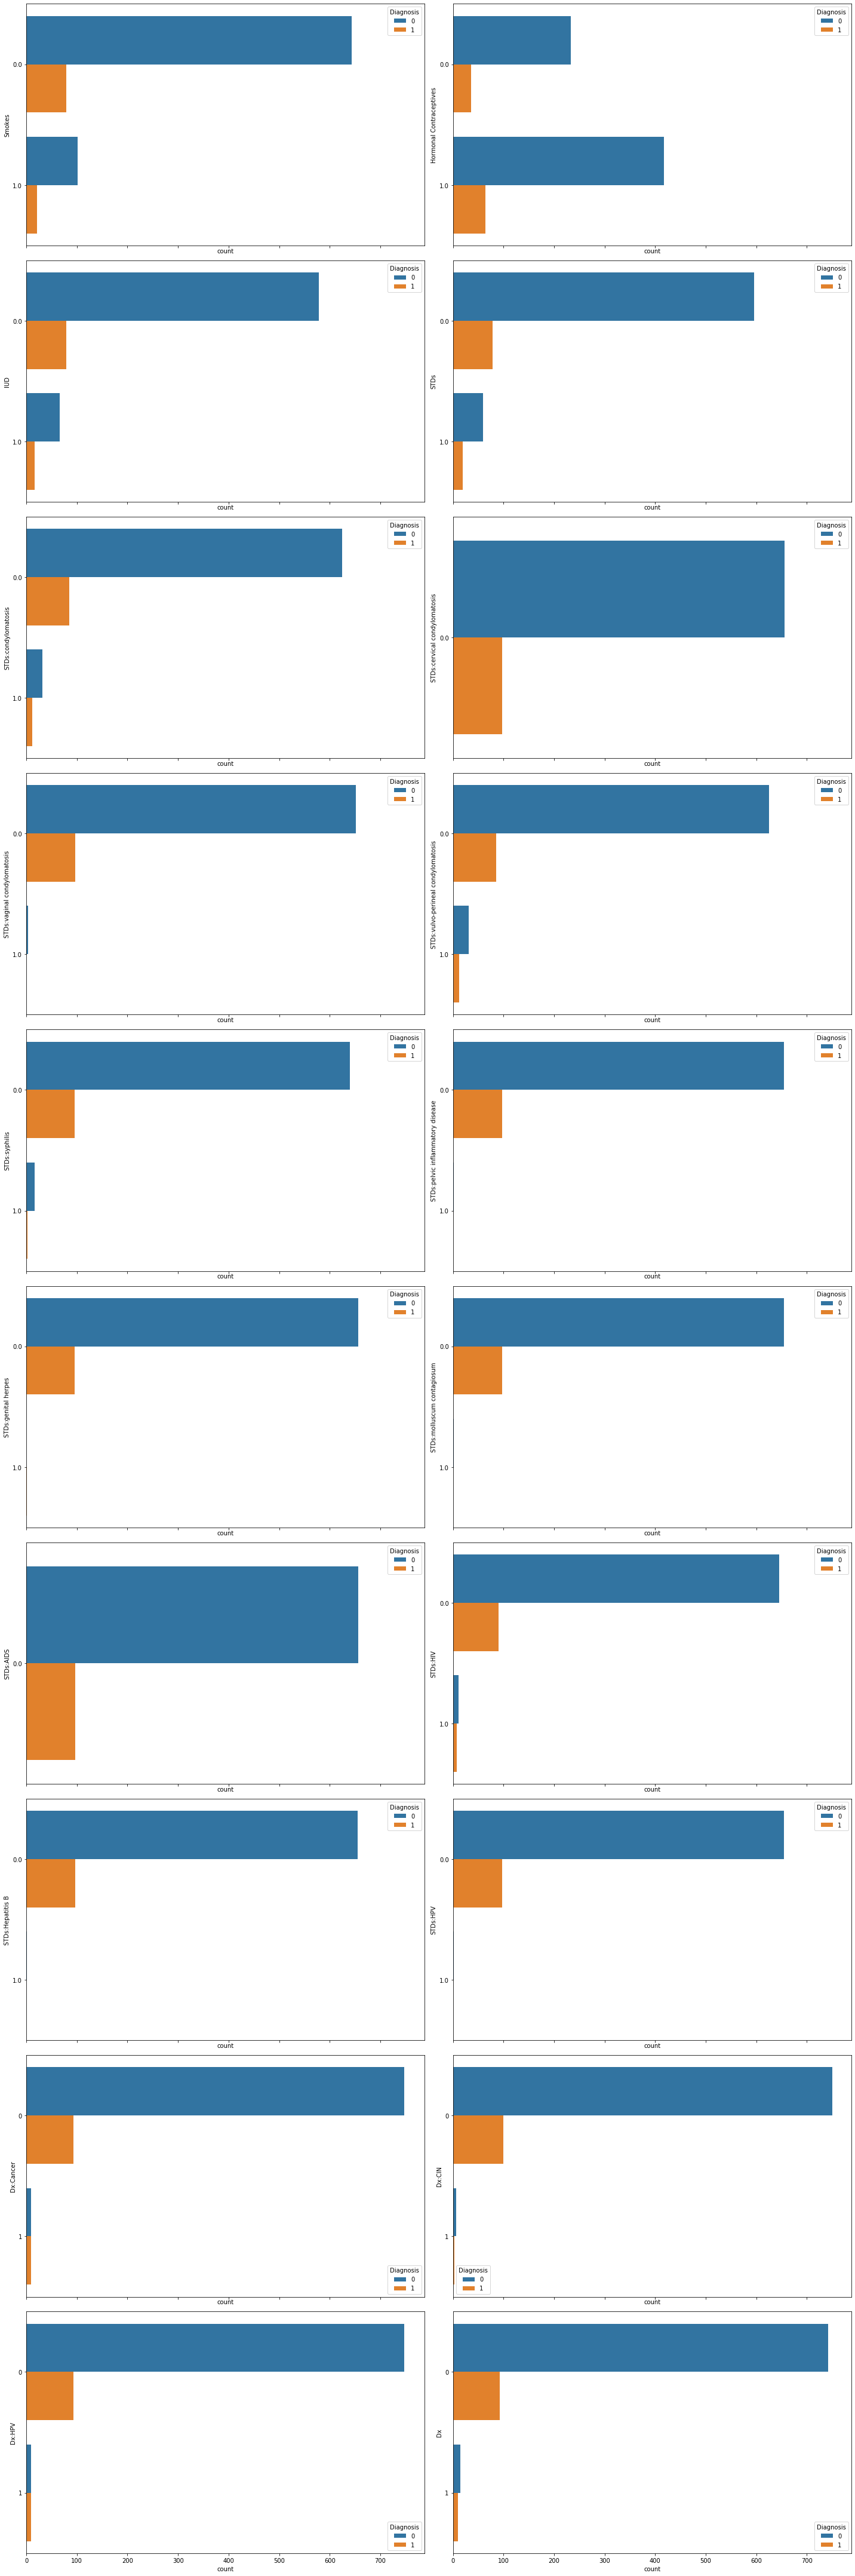

In [8]:
#visualise boolean variables by diagnosis
fig, axes = plt.subplots(10,2, figsize=(20,60), sharex=True)
axes = axes.flatten()
object_bol = data.dtypes == 'object'
for ax, barplot in zip(axes, data.dtypes[object_bol].index):
    sns.countplot(y=barplot, data=data, ax=ax, hue='Diagnosis')

plt.tight_layout()  
plt.show()

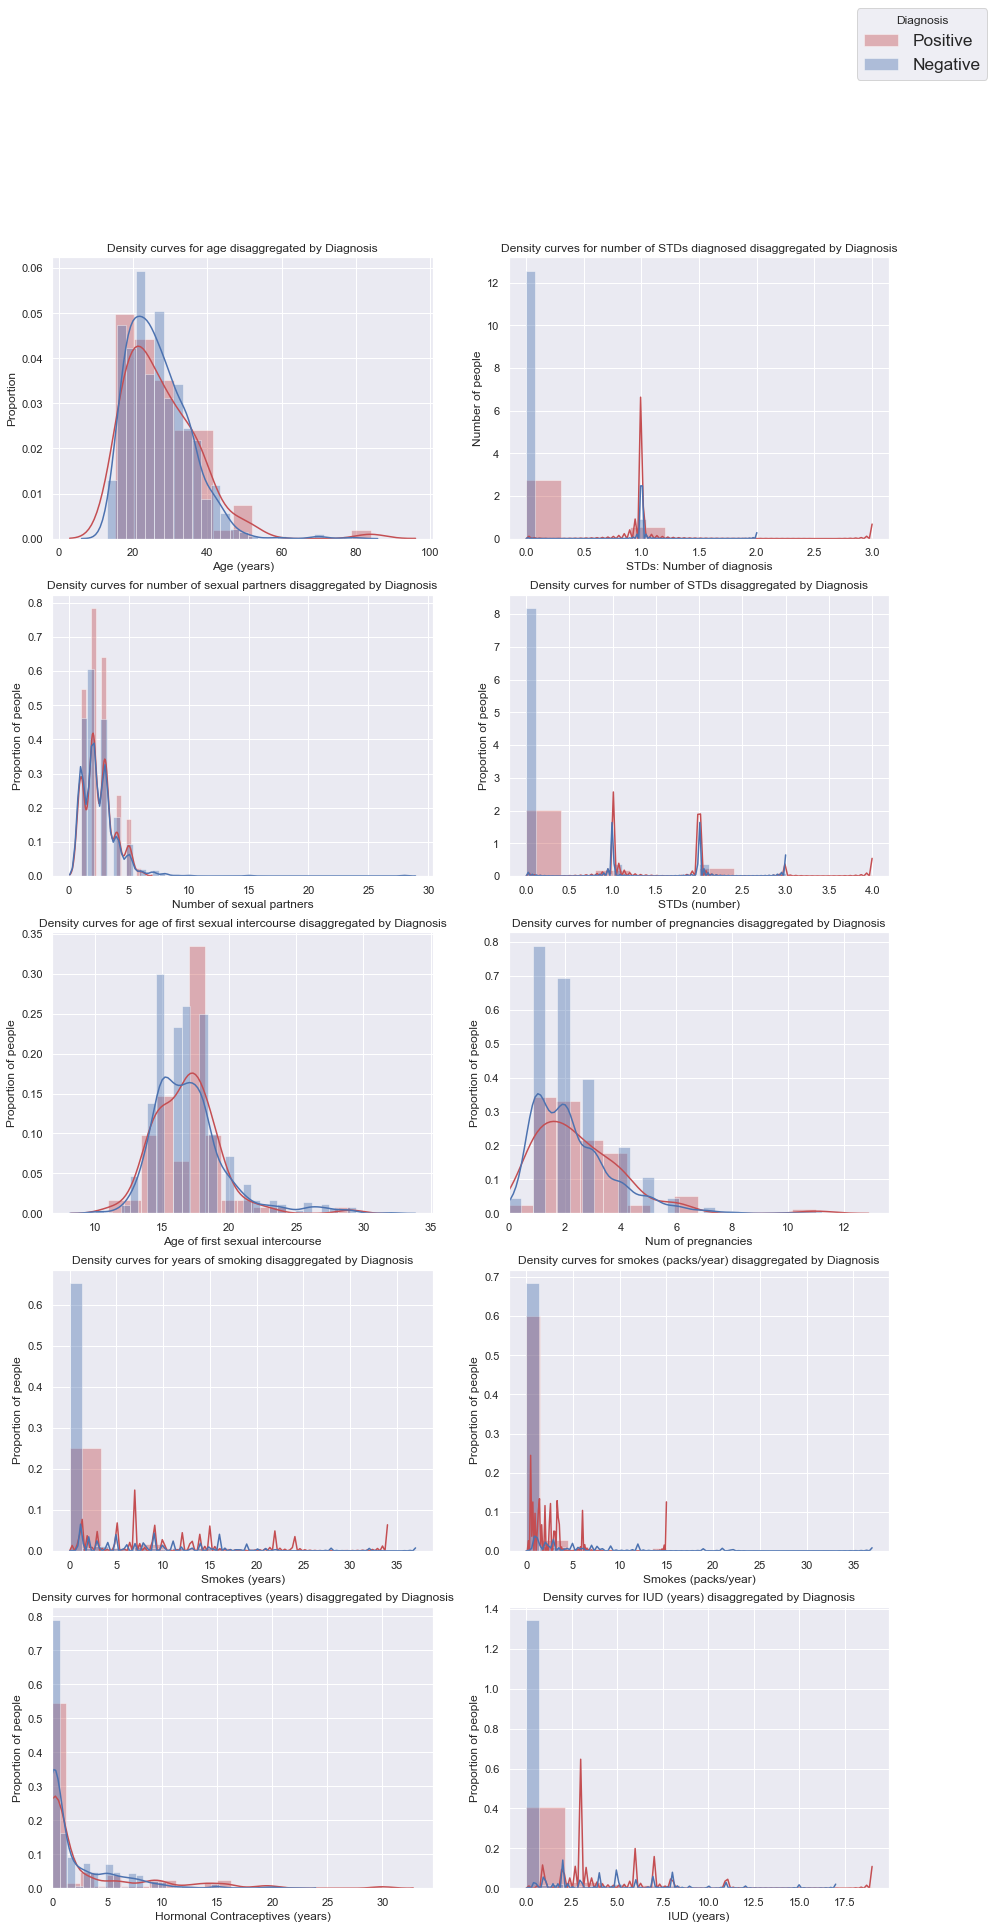

In [9]:
#visualise numerical variables by diagnosis 
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 30)

diag_true = (data['Diagnosis'] == 1)
diag_false = (data['Diagnosis'] == 0)
data_1 = data[diag_true]
data_2 = data[diag_false]
sns.distplot(data_1['Age'],  color="r", ax=axes[0][0])
sns.distplot(data_2['Age'],  color="b",  ax=axes[0][0])
axes[0][0].set(xlabel='Age (years)', ylabel='Proportion',title="Density curves for age disaggregated by Diagnosis",)

sns.distplot(data_1['Number of sexual partners'].dropna(), color="r", ax=axes[1][0])
sns.distplot(data_2['Number of sexual partners'].dropna(), color="b", ax=axes[1][0])
axes[1][0].set(xlabel='Number of sexual partners', ylabel='Proportion of people',title="Density curves for number of sexual partners disaggregated by Diagnosis",)

sns.distplot(data_1['STDs: Number of diagnosis'], color="r", ax=axes[0][1])
sns.distplot(data_2['STDs: Number of diagnosis'], color="b", ax=axes[0][1])
axes[0][1].set(xlabel='STDs: Number of diagnosis', ylabel='Number of people',title="Density curves for number of STDs diagnosed disaggregated by Diagnosis",)

sns.distplot(data_1['STDs (number)'],  color="r", ax=axes[1][1])
sns.distplot(data_2['STDs (number)'], color="b", ax=axes[1][1])
axes[1][1].set(xlabel='STDs (number)', ylabel='Proportion of people',title="Density curves for number of STDs disaggregated by Diagnosis",)

sns.distplot(data_1['First sexual intercourse'].dropna(), color="r", ax=axes[2][0])
sns.distplot(data_2['First sexual intercourse'].dropna(), color="b", ax=axes[2][0])
axes[2][0].set(xlabel='Age of first sexual intercourse', ylabel='Proportion of people',title="Density curves for age of first sexual intercourse disaggregated by Diagnosis",)

sns.distplot(data_1['Num of pregnancies'].dropna(), color="r", ax=axes[2][1])
sns.distplot(data_2['Num of pregnancies'].dropna(), color="b", ax=axes[2][1])
axes[2][1].set(xlabel='Num of pregnancies', ylabel='Proportion of people',title="Density curves for number of pregnancies disaggregated by Diagnosis",)
axes[2][1].set_xlim(0,)

sns.distplot(data_1['Smokes (years)'].dropna(), color="r", ax=axes[3][0])
sns.distplot(data_2['Smokes (years)'].dropna(), color="b", ax=axes[3][0])
axes[3][0].set(xlabel='Smokes (years)', ylabel='Proportion of people',title="Density curves for years of smoking disaggregated by Diagnosis",)


sns.distplot(data_1['Smokes (packs/year)'].dropna(), color="r", ax=axes[3][1])
sns.distplot(data_2['Smokes (packs/year)'].dropna(), color="b", ax=axes[3][1])
axes[3][1].set(xlabel='Smokes (packs/year)', ylabel='Proportion of people',title="Density curves for smokes (packs/year) disaggregated by Diagnosis",)


sns.distplot(data_1['Hormonal Contraceptives (years)'].dropna(), color="r", ax=axes[4][0])
sns.distplot(data_2['Hormonal Contraceptives (years)'].dropna(), color="b", ax=axes[4][0])
axes[4][0].set(xlabel='Hormonal Contraceptives (years)', ylabel='Proportion of people',title="Density curves for hormonal contraceptives (years) disaggregated by Diagnosis",)
axes[4][0].set_xlim(0,)

sns.distplot(data_1['IUD (years)'].dropna(), color="r", ax=axes[4][1])
sns.distplot(data_2['IUD (years)'].dropna(), color="b", ax=axes[4][1])
axes[4][1].set(xlabel='IUD (years)', ylabel='Proportion of people',title="Density curves for IUD (years) disaggregated by Diagnosis",)

fig.legend(title='Diagnosis', loc='upper right', labels=['Positive','Negative'], fontsize='x-large')


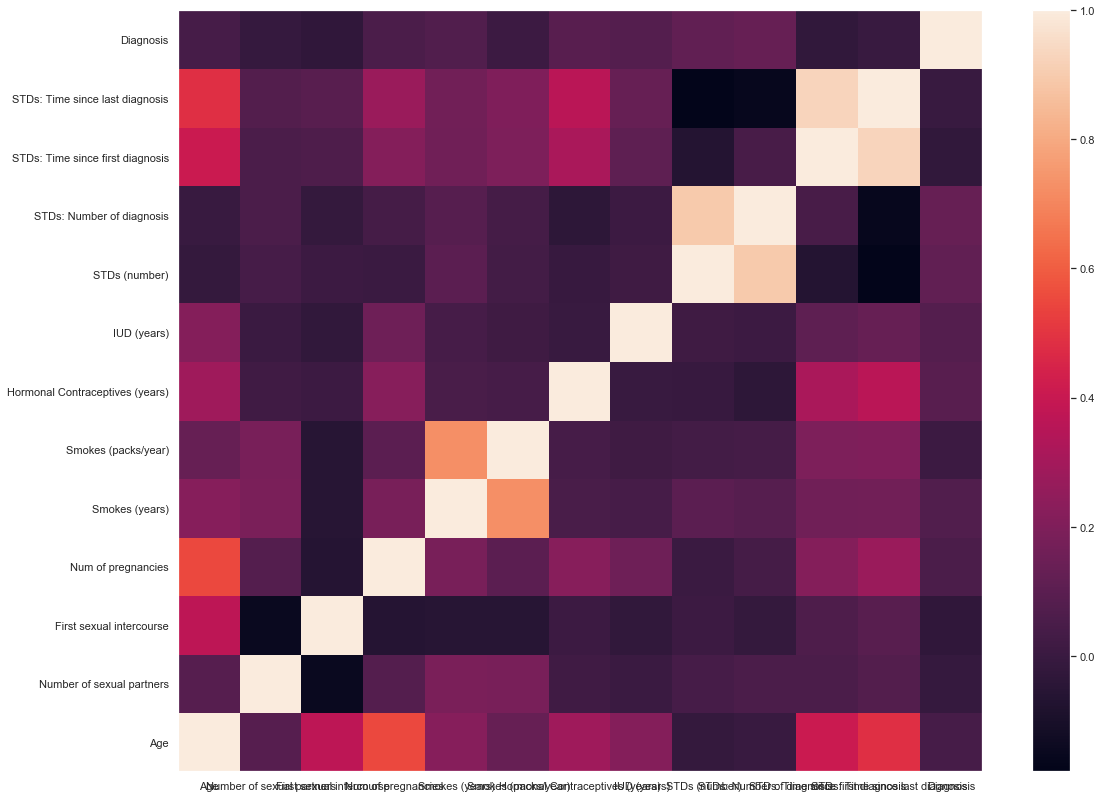

In [10]:
fig = plt.figure(figsize=(18, 14))
corr = data.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

## Data Pre-processing

In [11]:
data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [12]:
#given large number of nulls time since diagnosis columns will be removed
data = data.drop(columns=['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

In [13]:
#remaining nulls removed
data = data.dropna()

In [14]:
data.shape

(668, 31)

In [15]:
data = data.apply(pd.to_numeric)

**Lessons from data exploration**

+ Neither positive or negative observations have STDs: cervical condylomatosis, or AIDs, thus these features will not be included in the model.
+ Very small numbers of either have had a number of STDs, but these will be retained as some have still had it
+ Differences in bar charts are mainly as there are fewer positive than negative people and total counts are shown, not proportions. Given the smaller numbers, that there are approximately the same numbers for Dx, this suggests previous diagnosis of other or the same conditions increases the likelihood or a positive diagnosis in this case
+ There are small differences observed in the distributions between positive and negative diagnosis in age, numbers of sexual partners, age at first sexual intercourse, number of pregnancies, and years on hormonal contraceptives
+ There are larger differences in the number of STD diagnoses, the number of STDs, smoking indicators, and IUD (years)
+ There is a very high correlation between number of STDs and number diagnosed. As they essentially mean the same thing, the number of STDs diagnosed will be retained as this may be a more accurate measure of the number of STDs a person has had.

## Feature selection and train-test split

In [16]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Diagnosis'],
      dtype='object')

In [17]:
X = data[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs','STDs:condylomatosis','STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum','STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']].values

Y = data['Diagnosis'].values

In [18]:
Y = np.expand_dims(Y, -1)

In [19]:
def train_test_split(X, Y, split=0.2, random_state=42):
    indices = np.random.permutation(X.shape[0])
    split = int(split * X.shape[0])

    train_indices = indices[split:]
    test_indices = indices[:split]

    x_train, x_test = X[train_indices], X[test_indices]
    y_train, y_test = Y[train_indices], Y[test_indices]

    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = train_test_split(X, Y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(535, 27) (133, 27) (535, 1) (133, 1)


## Building the algorithm functions

For the logistic regression function the following is needed:
+ The Logistic Regression model can be divided into two parts: (1) the part that calcualtes scores using linear operations (mulitplication and additon); (2) the part that calculates probabilities using non-linear operation (sigmoid function)
+ Sigmoid function (see below): the purpose of the sigmoid function is to squash the linear regression desired score down to a range of [0,1] for the logistic regression desired outcome. The function represents a curve that at minima approaches 0 and at the maxima approaches 1. It approaches minima for higher negative values and approaches maxima for higher positive values. This gives us a chance to define our score in such a manner that a positive cancer diagnosis (1) will have a higher positive score while a negative cancer diagnosis (0) will have a higher negative score.

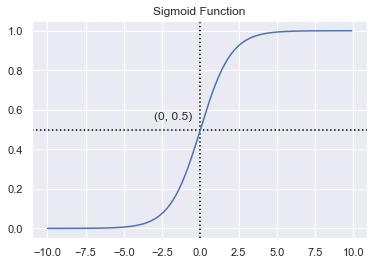

Evaluate sigmoid(0) = 0.5


In [20]:
#create sigmoid function.
def sigmoid(z):
    """
    The sigmoid function.
    Args:
        z: float, vector, matrix
    Returns:
        sigmoid: float
    """
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

#visualise sigmoid function
x = np.arange(-10, 10, 0.1)
plt.axhline(y=0.5, c='black', ls=':')
plt.axvline(x=0, c='black', ls=':')
plt.annotate('(0, 0.5)', xy=(0, 0.5), xytext=(-3, 0.55))
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Function')
plt.show()

print('Evaluate sigmoid(0) =', sigmoid(0))

The model essentially defines a decision boundary (hyper-plane) between two classes - if a new point comes into the model and is on the positive side of this boundary, it will be given the positive class, with higher probability of being positive, else it will be given a negative class, with lower probability of being positive

The decision boundary is the hyperplane represented by the equation:

<img src="https://predictiveprogrammer.com/wp-content/uploads/2018/11/decision_boundary_eq.jpg" style="height:50px">

Thus, the decision boundary is the line where probability of being positive is 0.5. This is because sigmoid(0) = 0.5. 

To compute wi such that the probabilities are correct, a loss function is needed to help define the lack of probable scenarios (i.e. a loss function that gives higher loss when the likelihood of being positive is wrongly produced by the model).

To come up with a loss function, the concept of maximum likelihood estimation is required. This is a method of estimating the parameters of a statistical model, given the observations. This involves finding the liklihood of the system as the product of probability being positive for all positive points mulitplied by the product of probability of being negative for all negative points - the higher the value, the better the system has performed (more accurate the position of the decision boundary).

To reduce the complexity of probability mulitplication, the log function is introduced to find the log-likelihood. Since log of numbers between 0 and 1 is negative, a negative sign is added to find the log-likelihood, which is called cross-entropy. Since the negative sign has been added ahead of log-likelihood, minimising cross-entropy is similar to maximising the model likelihood - a loss function.

A general formula of cross-entropy for a binary classifier is: 

<img src="https://predictiveprogrammer.com/wp-content/uploads/2018/11/binary_cross_entropy.jpg" style="height:50px">

Where m is the number of examples, yhat is the predicted probability of being positive, and y is the true value (1 for positive, 0 for negative).

When considering the following portion of the cross-entropy equation:

<img src="https://predictiveprogrammer.com/wp-content/uploads/2018/11/cost.jpg" style="height:50px">

Think of two cases:
1. input belonged to the positive class, or y = 1 (true value is positive). Thererfore, (1 - y) = 0, and so the term becomes -1 log(yhat) – 0 log(1 – yhat) = -log(yhat)
2. input belonged to the negative class, or y = 0 (true value is negative). Therefore, (1 - y) = 1, and so the term becomes -0 log(yhat) – 1 log(1 – yhat) = -log(1 – yhat)

This is what the cross-entropy is doing. The log probabilities for all positive points (of being positive) and log probabilities for all negative points (of not being positive) are found.

To find the decision boundary for the model, the binary entropy of the model needs to be minimised. To do this requires gradient descent, which uses the gradients of the loss function w.r.t to weights to find the direction of weights in which to descend the loss curve. Assuming, for the sake of simplicity, tha the logistic regression model has only two paramters, weight w and bias b, the process for logistic regression is as follows:
1. Initialize weight w and bias b to any random numbers.
2. Pick a value for the learning rate α. The learning rate determines how big the step would be on each iteration.
    If α is very small, it would take long time to converge and become computationally expensive.
    If α is large, it may fail to converge and overshoot the minimum.
3. Scale the data if it’s on a very different scales, otherwise the level curves (contours) would be narrower and taller which means it would take longer time to converge. The equation to scale:
<img src="https://miro.medium.com/max/1146/1*2g6dhidPigWEuAFyNHL8iw.png" style="height:50px">
4. On each iteration, take the partial derivative of the cost function J(w) w.r.t each parameter (gradient):
<img src="https://miro.medium.com/max/1268/1*WmuFVQbceFdNKO2Usl_O7A.png" style="height:50px">

The update equations are:
<img src="https://miro.medium.com/max/2964/1*VDTl0P6ongCcM0AgDPUR_g.png" style="height:50px">

+ For the sake of illustration, let’s assume we don’t have bias. If the slope of the current value of w > 0, this means that we are to the right of optimal w*. Therefore, the update will be negative, and will start getting close to the optimal values of w*. However, if it’s negative, the update will be positive and will increase the current values of w to converge to the optimal values of w*(see figure):

<img src="https://miro.medium.com/max/2284/1*jNyE54fTVOH1203IwYeNEg.png" style="height:300px">

+ Continue the process until the cost function converges. That is, until the error curve becomes flat and doesn’t change.
+ In addition, on each iteration, the step would be in the direction that gives the maximum change since it’s perpendicular to level curves at each step.

For this to work, the derivative of loss function w.r.t weights is needed, requiring the following equation:
<img src="https://predictiveprogrammer.com/wp-content/uploads/2018/11/dj_by_dw.jpg" style="height:50px">
Where xi represents the ith value of vector x. Each value in vector x represents the sum of all the training examples for a given feature.

## Creating the Logistic Regression Class

In [21]:
class LogisticRegression:
    
    #__init__(): constructor takes learning rate (lr) as well as number of iterations (n_iter) as params.
    def __init__(self, lr=0.01, n_iter=100):
        self.lr = lr
        self.n_iter = n_iter

    #predict(): takes input features (X), normalises it, and predicts result. 
    #depends on 2 helper methods _linear() and _non_linear().
    #returns 1 for probability >=0.5, else 0
    def predict(self, X):
        X = self.normalize(X)
        linear = self._linear(X)
        preds = self._non_linear(linear)
        return (preds >= 0.5).astype('int')

    #_non_linear(): takes input (X) result of _linear() and apply 
    #sigmoid – second part of the prediction.
    def _non_linear(self, X):
        return 1 / (1 + np.exp(-X))

    #_linear(): takes input features (X) and apply weighted sum – 
    #first part of prediction.
    def _linear(self, X):
        return np.dot(X, self.weights) + self.bias

    def initialize_weights(self, X):
        #have same number of weights as number of features
        self.weights = np.random.rand(X.shape[1], 1)
        #add a bias to terms that can be interpretted as y intercept of model
        self.bias = np.zeros((1,))

    #fit(): gradient descent process. It takes in features (X_train) and true 
    #labels (Y_train) to fine-tune weights using gradient descent
    def fit(self, X_train, Y_train):
        self.initialize_weights(X_train)

        #get mean and stddev for normalisation
        self.x_mean = X_train.mean(axis=0).T
        self.x_stddev = X_train.std(axis=0).T

        #normalise data
        X_train = self.normalize(X_train)

        #run gradient descent for n iterations
        for i in range(self.n_iter):
            #make normalised predictions
            probs = self._non_linear(self._linear(X_train))
            diff = probs - Y_train

            #d/dw and d/db of mse
            delta_w = np.mean(diff * X_train, axis=0, keepdims=True).T
            delta_b = np.mean(diff)

            #update weights
            self.weights = self.weights - self.lr * delta_w
            self.bias = self.bias - self.lr * delta_b
        return self

    #normalize(): always better to normalise inputs as features may have varying value ranges
    #which can give unfair weight to values with higher values and reduce efficiency of 
    #gradient descent. Converting every value such that the mean is 0 and 
    #std is 1 helps overcome this. But this must be used on prediction data also
    def normalize(self, X):
        X = (X - self.x_mean) / self.x_stddev
        return X

    #accuracy(): find accuracy of model; equal to mean of number of correct predictions
    #finds all correct predictions, counts them and divides by total number of predictions made
    def accuracy(self, X, y):
        preds = self.predict(X)
        return np.mean(preds == y)

    def loss(self, X, y):
        probs = self._non_linear(self._linear(X))

        #entropy when true class is positive
        pos_log = y * np.log(probs + 1e-15)
        #entropy when true class is negative
        neg_log = (1 - y) * np.log((1 - probs) + 1e-15)

        l = -np.mean(pos_log + neg_log)
        return l

## Initialise and train the model

In [22]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

## Test the model

In [23]:
print('Accuracy on test set: {:.2f}%'.format(lr.accuracy(x_test, y_test) * 100))

Accuracy on test set: 85.71%


## Using SKLearn

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

lr = LogisticRegression()
lr.fit(x_train, y_train[:, 0])
print('Accuracy on test set: {:.2f}%'.format(lr.score(x_test, y_test[:, 0]) * 100))

Accuracy on test set: 84.96%


Both the model from scratch and the SKLearn model performed the same, with the model from scratch performing slightly better than the sklearn model.